In [5]:
import numpy as np
import keras
from keras.datasets import cifar10
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Data loading

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# EDA

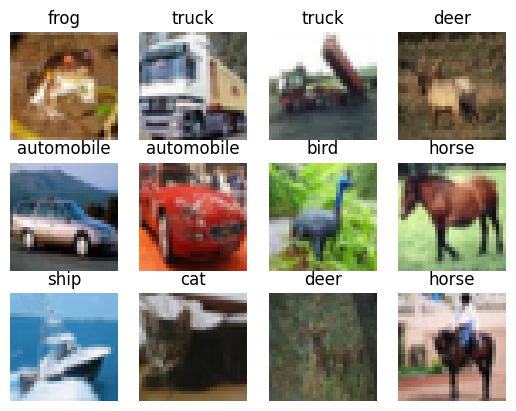

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(0)
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i,0]])
plt.show()

In [8]:
x_train.mean(axis=0).shape

(32, 32, 3)

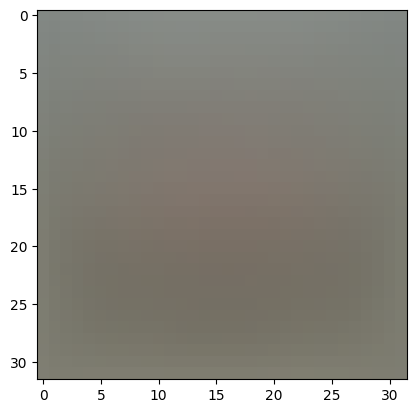

In [9]:
plt.imshow(x_train.mean(axis=0))

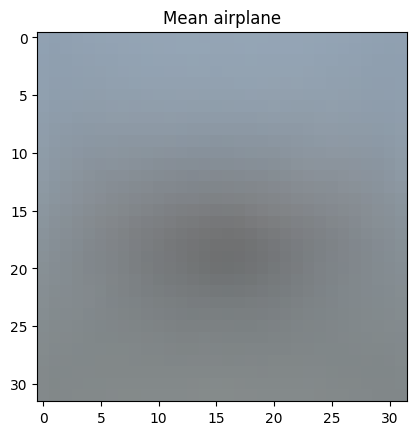

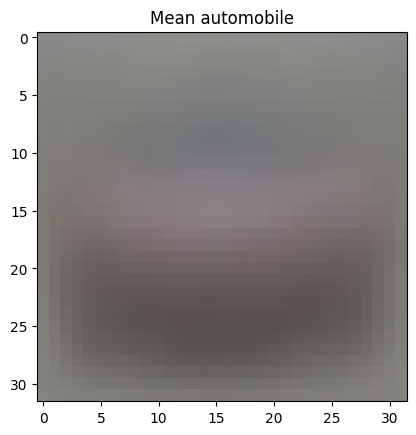

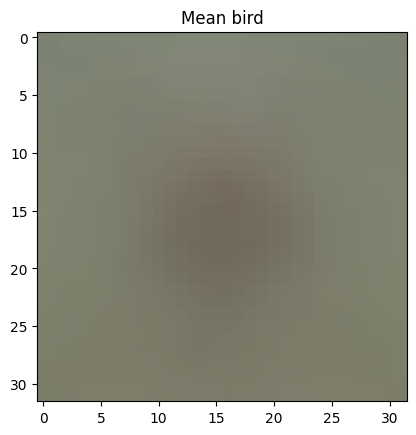

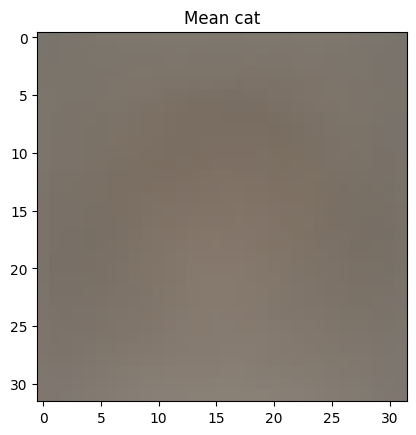

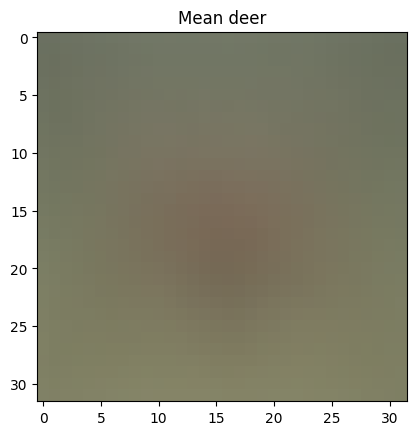

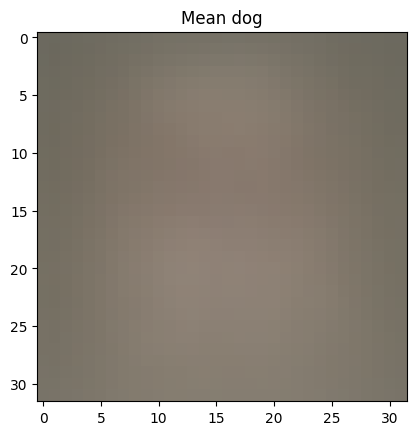

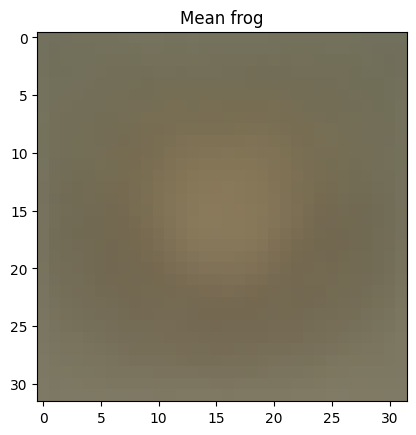

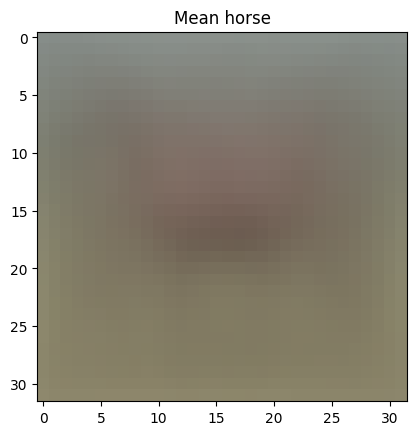

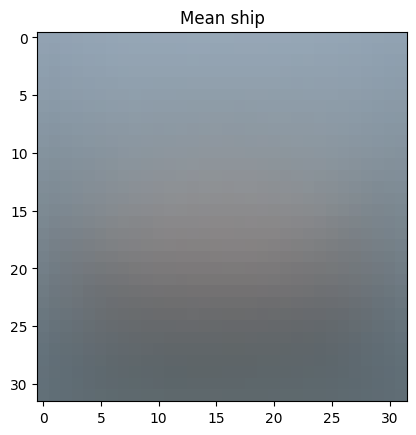

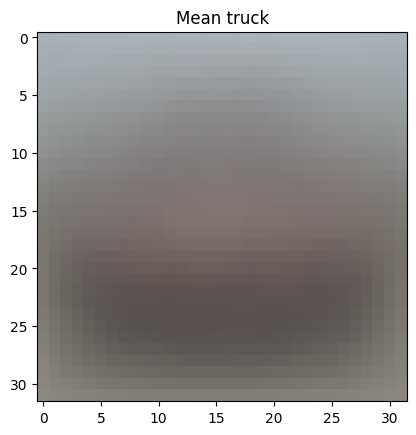

In [10]:
for i in np.unique(y_train):
    plt.imshow(x_train[(y_train==i).flatten(),:,:].mean(axis=0))
    plt.title(f'Mean {class_names[i]}')
    plt.show()

C:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


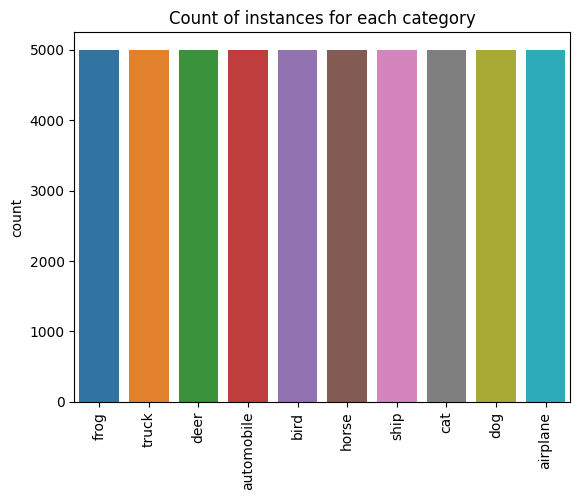

In [11]:
sns.countplot(x=list(map(lambda x: class_names[x], y_train.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

C:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


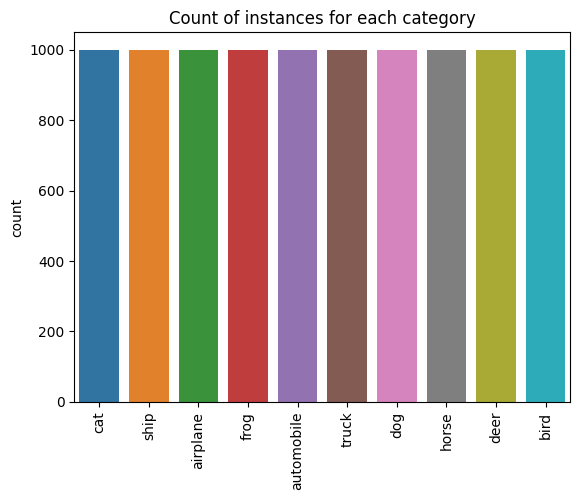

In [12]:
sns.countplot(x=list(map(lambda x: class_names[x], y_test.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

# CNN

In [40]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Base model

In [75]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(36, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(10, activation='softmax'))

In [76]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [77]:
history_cnn = cnn.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3937 - loss: 1.6951 - val_accuracy: 0.5423 - val_loss: 1.2870
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5728 - loss: 1.2193 - val_accuracy: 0.5861 - val_loss: 1.1791
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6210 - loss: 1.1016 - val_accuracy: 0.6117 - val_loss: 1.1336
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6438 - loss: 1.0351 - val_accuracy: 0.5969 - val_loss: 1.1742
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6625 - loss: 0.9808 - val_accuracy: 0.6174 - val_loss: 1.1195
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6815 - loss: 0.9216 - val_accuracy: 0.6123 - val_loss: 1.1208
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6994 - loss: 0.8766 - val_accuracy: 0.6439 - val_loss: 1.0499
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7073 -

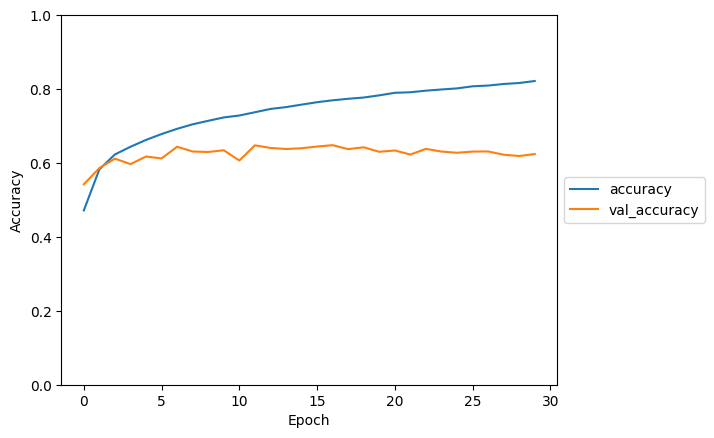

In [101]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

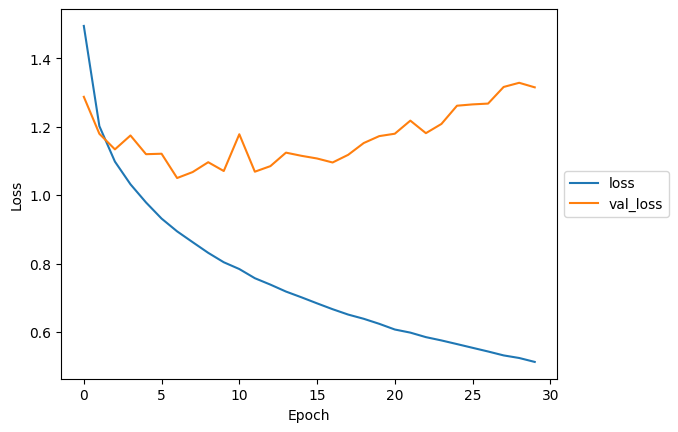

In [102]:
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [80]:
# loss function and accuracy on test set for model [cnn]
test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.6241 - loss: 1.3147


In [81]:
test_loss_cnn

1.3146998882293701

In [82]:
test_acc_cnn

0.6241000294685364

## Change number of kernels/filters

In [85]:
def kernel_num_model(kernel_num):
    kmodel = keras.models.Sequential()
    kmodel.add(keras.Input(shape=(32, 32, 3)))
    kmodel.add(keras.layers.Conv2D(filters = kernel_num, 
                             kernel_size = (3, 3), 
                             padding = 'valid',
                             strides = 1,
                             activation='relu'))
    kmodel.add(keras.layers.MaxPooling2D((2, 2)))
    kmodel.add(keras.layers.Flatten())
    kmodel.add(keras.layers.Dense(10, activation='softmax'))
    kmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return kmodel
    

In [86]:
m = 1 #repeat
kernel_nums = [16+8*i for i in range(10)]
n = len(kernel_nums)
train_acc_k = np.zeros((n,20))
test_acc_k = np.zeros((n,20))
train_loss_k = np.zeros((n,20))
test_loss_k = np.zeros((n,20))
for j in range(m):
    for i in range(n):
        temp_model1_k = kernel_num_model(kernel_nums[i])
        temp_model_k = temp_model1_k.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
        train_acc_k[i,:] = temp_model_k.history['accuracy']
        test_acc_k[i,:] = temp_model_k.history['val_accuracy']
        train_loss_k[i,:] = temp_model_k.history['loss']
        test_loss_k[i,:] = temp_model_k.history['val_loss']
        print(f'ROUND {j*n+i}')

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3777 - loss: 1.7533 - val_accuracy: 0.5274 - val_loss: 1.3543
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5530 - loss: 1.2886 - val_accuracy: 0.5604 - val_loss: 1.2551
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5919 - loss: 1.1850 - val_accuracy: 0.5751 - val_loss: 1.2196
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6125 - loss: 1.1311 - val_accuracy: 0.5942 - val_loss: 1.1690
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6262 - loss: 1.0830 - val_accuracy: 0.5928 - val_loss: 1.1772
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6371 - loss: 1.0522 - val_accuracy: 0.5836 - val_loss: 1.1869
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6491 - loss: 1.0229 - val_accuracy: 0.6052 - val_loss: 1.1391
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6555 - loss

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7165 - loss: 0.8161 - val_accuracy: 0.6295 - val_loss: 1.0888
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7291 - loss: 0.7941 - val_accuracy: 0.6448 - val_loss: 1.0540
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7365 - loss: 0.7736 - val_accuracy: 0.6304 - val_loss: 1.0997
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7376 - loss: 0.7579 - val_accuracy: 0.6393 - val_loss: 1.0895
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7443 - loss: 0.7416 - val_accuracy: 0.6387 - val_loss: 1.0973
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7531 - loss: 0.7204 - val_accuracy: 0.6382 - val_loss: 1.0930
Epoch 16/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7582 - loss: 0.7036 - val_accuracy: 0.6357 - val_loss: 1.1050
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7620 - los

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8243 - loss: 0.5202 - val_accuracy: 0.6392 - val_loss: 1.2005
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8280 - loss: 0.5083 - val_accuracy: 0.6333 - val_loss: 1.2217
ROUND 4
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4246 - loss: 1.6345 - val_accuracy: 0.5770 - val_loss: 1.2200
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5901 - loss: 1.1854 - val_accuracy: 0.5928 - val_loss: 1.1871
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6382 - loss: 1.0537 - val_accuracy: 0.5908 - val_loss: 1.1965
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6645 - loss: 0.9791 - val_accuracy: 0.6216 - val_loss: 1.0877
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6821 - loss: 0.9206 - val_accuracy: 0.6306 - val_loss: 1.0682
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6991 - loss: 0.8

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7463 - loss: 0.7390 - val_accuracy: 0.6382 - val_loss: 1.0725
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7605 - loss: 0.6925 - val_accuracy: 0.6387 - val_loss: 1.0841
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7723 - loss: 0.6569 - val_accuracy: 0.6366 - val_loss: 1.1191
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7823 - loss: 0.6343 - val_accuracy: 0.6364 - val_loss: 1.1162
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7952 - loss: 0.5966 - val_accuracy: 0.6305 - val_loss: 1.1750
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8028 - loss: 0.5751 - val_accuracy: 0.6368 - val_loss: 1.1603
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8133 - loss: 0.5495 - val_accuracy: 0.6323 - val_loss: 1.1893
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8257 - loss

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8468 - loss: 0.4481 - val_accuracy: 0.6399 - val_loss: 1.2664
Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8540 - loss: 0.4259 - val_accuracy: 0.6209 - val_loss: 1.3908
Epoch 19/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8613 - loss: 0.4061 - val_accuracy: 0.6397 - val_loss: 1.3257
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8716 - loss: 0.3822 - val_accuracy: 0.6347 - val_loss: 1.3712
ROUND 9


In [ ]:
train_acc_k.mean(axis=1)

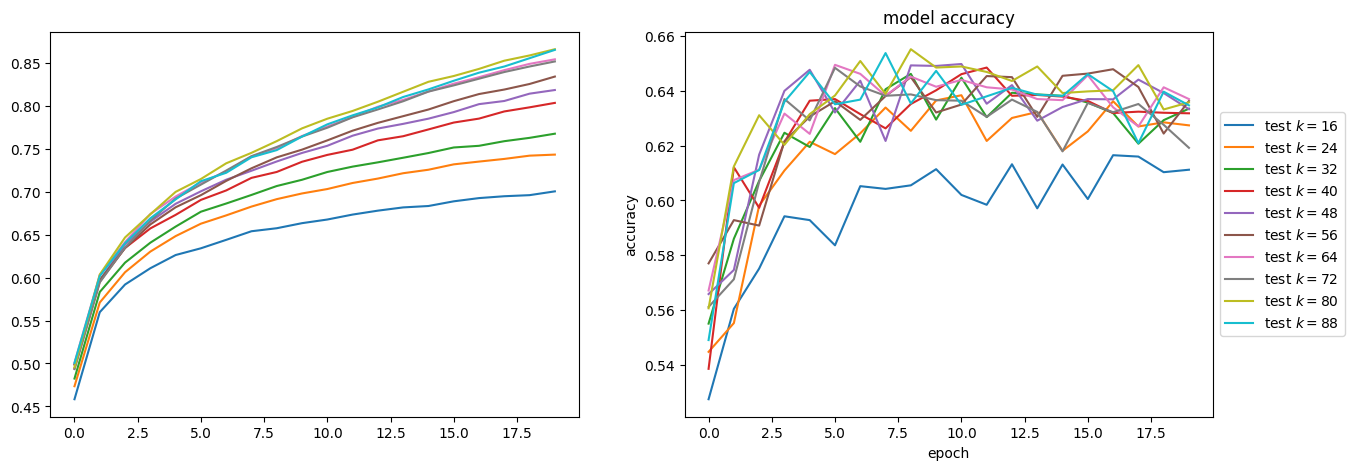

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    axes[0].plot(range(20), train_acc_k[i,:], label=f'train $k={kernel_nums[i]}$')
    axes[1].plot(range(20), test_acc_k[i,:], label=f'test $k={kernel_nums[i]}$')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

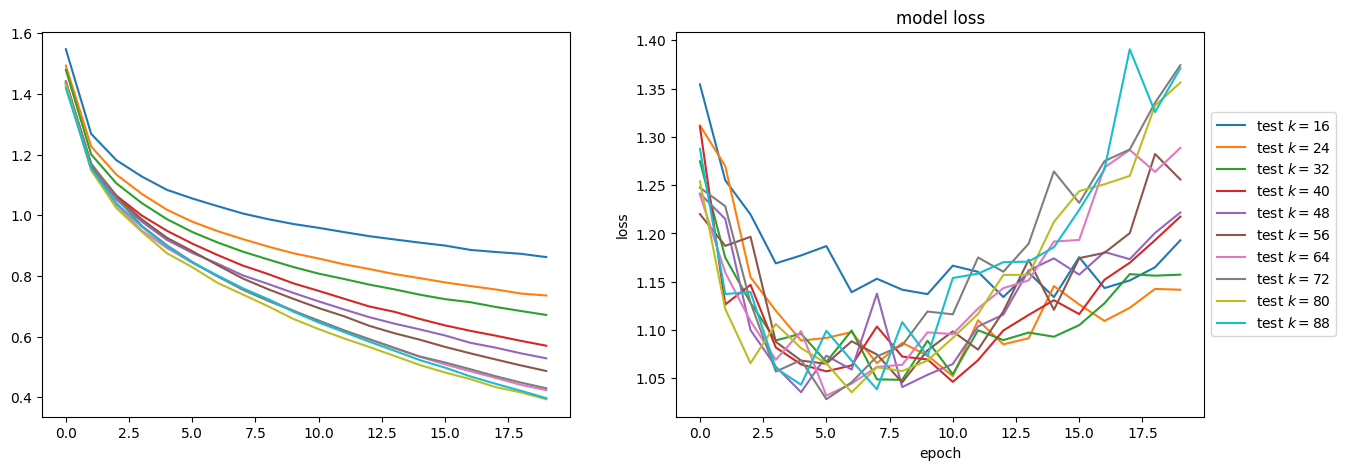

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    axes[0].plot(range(20), train_loss_k[i,:], label=f'train $k={kernel_nums[i]}$')
    axes[1].plot(range(20), test_loss_k[i,:], label=f'test $k={kernel_nums[i]}$')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Change kernel size

In [92]:
def kernel_size_model(ks):
    ksmodel = keras.models.Sequential()
    ksmodel.add(keras.Input(shape=(32, 32, 3)))
    ksmodel.add(keras.layers.Conv2D(filters = 36, 
                             kernel_size = (ks, ks), 
                             padding = 'valid',
                             strides = 1,
                             activation='relu'))
    ksmodel.add(keras.layers.MaxPooling2D((2, 2)))
    ksmodel.add(keras.layers.Flatten())
    ksmodel.add(keras.layers.Dense(10, activation='softmax'))
    ksmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return ksmodel
    

In [93]:
m = 1 #repeat
n = 10
train_acc_ks = np.zeros((n,20))
test_acc_ks = np.zeros((n,20))
train_loss_ks = np.zeros((n,20))
test_loss_ks = np.zeros((n,20))
for j in range(m):
    for i in range(n):
        temp_model1_ks = kernel_size_model(i+1)
        temp_model_ks = temp_model1_ks.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
        train_acc_ks[i,:] = temp_model_ks.history['accuracy']
        test_acc_ks[i,:] = temp_model_ks.history['val_accuracy']
        train_loss_ks[i,:] = temp_model_ks.history['loss']
        test_loss_ks[i,:] = temp_model_ks.history['val_loss']
        print(f'ROUND {j*n+i}')

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3616 - loss: 1.8228 - val_accuracy: 0.4525 - val_loss: 1.5509
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4757 - loss: 1.5269 - val_accuracy: 0.4771 - val_loss: 1.4858
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4931 - loss: 1.4615 - val_accuracy: 0.4764 - val_loss: 1.4719
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5112 - loss: 1.4104 - val_accuracy: 0.4999 - val_loss: 1.4301
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5174 - loss: 1.3865 - val_accuracy: 0.5086 - val_loss: 1.4100
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5348 - loss: 1.3470 - val_accuracy: 0.5055 - val_loss: 1.4136
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5401 - loss: 1.3310 - val_accuracy: 0.5248 - val_loss: 1.3673
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5400 - loss: 1.3170

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7291 - loss: 0.7849 - val_accuracy: 0.6496 - val_loss: 1.0282
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7324 - loss: 0.7628 - val_accuracy: 0.6377 - val_loss: 1.0755
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7461 - loss: 0.7372 - val_accuracy: 0.6542 - val_loss: 1.0232
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7561 - loss: 0.7128 - val_accuracy: 0.6538 - val_loss: 1.0493
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7594 - loss: 0.7001 - val_accuracy: 0.6523 - val_loss: 1.0528
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7705 - loss: 0.6750 - val_accuracy: 0.6392 - val_loss: 1.1060
Epoch 16/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7749 - loss: 0.6581 - val_accuracy: 0.6369 - val_loss: 1.1296
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7778 - loss: 0.6478 - val

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7752 - loss: 0.6437 - val_accuracy: 0.6154 - val_loss: 1.2574
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7787 - loss: 0.6316 - val_accuracy: 0.6176 - val_loss: 1.3076
ROUND 4
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3916 - loss: 1.7073 - val_accuracy: 0.5175 - val_loss: 1.3835
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5442 - loss: 1.3001 - val_accuracy: 0.5676 - val_loss: 1.2463
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5857 - loss: 1.1999 - val_accuracy: 0.5866 - val_loss: 1.2003
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6113 - loss: 1.1197 - val_accuracy: 0.5926 - val_loss: 1.1783
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6292 - loss: 1.0649 - val_accuracy: 0.6018 - val_loss: 1.1514
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6532 - loss: 1.0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6306 - loss: 1.0669 - val_accuracy: 0.5830 - val_loss: 1.2253
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6450 - loss: 1.0233 - val_accuracy: 0.5761 - val_loss: 1.2569
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6530 - loss: 1.0054 - val_accuracy: 0.5950 - val_loss: 1.2163
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6584 - loss: 0.9885 - val_accuracy: 0.5907 - val_loss: 1.2502
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6648 - loss: 0.9649 - val_accuracy: 0.5863 - val_loss: 1.2538
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6685 - loss: 0.9536 - val_accuracy: 0.5704 - val_loss: 1.3042
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6793 - loss: 0.9321 - val_accuracy: 0.5967 - val_loss: 1.2403
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6816 - loss: 0.9202

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6182 - loss: 1.1001 - val_accuracy: 0.5611 - val_loss: 1.3013
Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6159 - loss: 1.0998 - val_accuracy: 0.5649 - val_loss: 1.2987
Epoch 19/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6260 - loss: 1.0787 - val_accuracy: 0.5587 - val_loss: 1.3519
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6264 - loss: 1.0716 - val_accuracy: 0.5531 - val_loss: 1.3465
ROUND 9


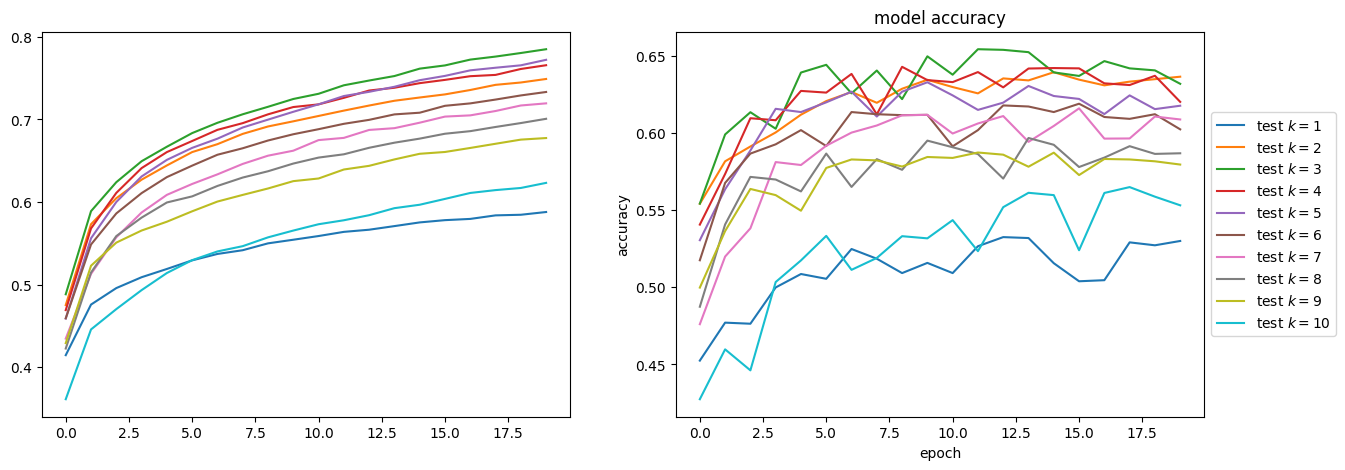

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ksizes = range(1,n+1)
for i in range(10):
    axes[0].plot(range(20), train_acc_ks[i,:], label=f'train $k={ksizes[i]}$')
    axes[1].plot(range(20), test_acc_ks[i,:], label=f'test $k={ksizes[i]}$')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

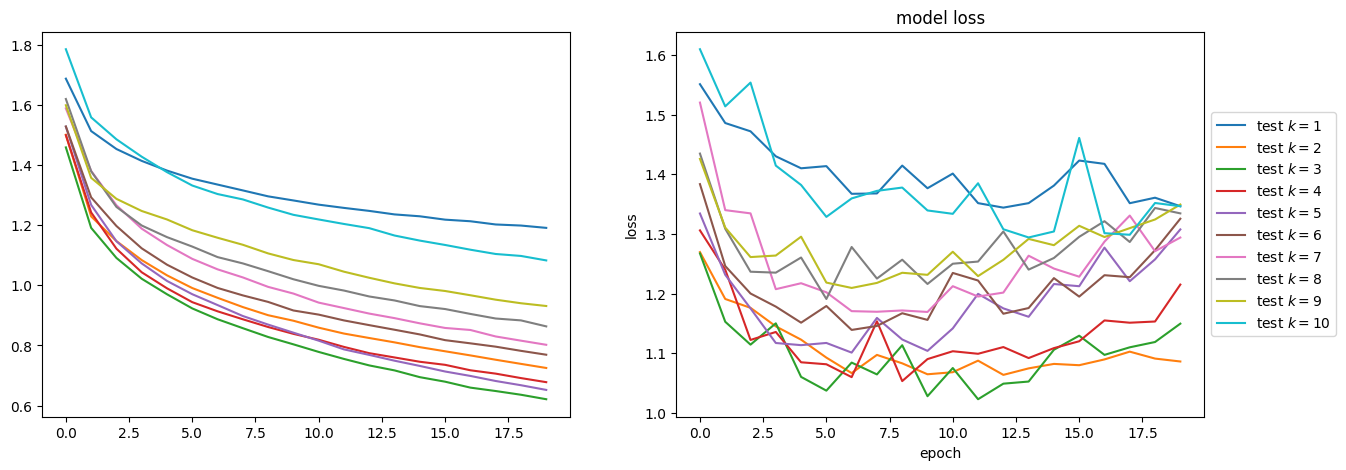

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    axes[0].plot(range(20), train_loss_ks[i,:], label=f'train $k={ksizes[i]}$')
    axes[1].plot(range(20), test_loss_ks[i,:], label=f'test $k={ksizes[i]}$')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Change padding

In [132]:
def padding_model(p):
    pmodel = models.Sequential()
    pmodel.add(Input(shape=(32, 32, 3)))
    pmodel.add(layers.Conv2D(filters = 36, 
                             kernel_size = (3, 3), 
                             padding = p,
                             strides = 1,
                             activation='relu'))
    pmodel.add(layers.MaxPooling2D((2, 2)))
    pmodel.add(layers.Flatten())
    pmodel.add(layers.Dense(10))
    pmodel.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return pmodel
    

In [137]:
m = 20 #repeat
padding_opt = ['valid', 'same']
n = len(padding_opt)
train_acc_p = np.zeros((n,m))
test_acc_p = np.zeros((n,m))
train_loss_p = np.zeros((n,m))
test_loss_p = np.zeros((n,m))
for i in range(n):
    temp_model1_p = padding_model(padding_opt[i])
    temp_model_p = temp_model1_p.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
    train_acc_p[i,:] = temp_model_p.history['accuracy']
    test_acc_p[i,:] = temp_model_p.history['val_accuracy']
    train_loss_p[i,:] = temp_model_p.history['loss']
    test_loss_p[i,:] = temp_model_p.history['val_loss']
    print(f'ROUND {j*n+i}')

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.4157 - loss: 1.6414 - val_accuracy: 0.5256 - val_loss: 1.3394
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5698 - loss: 1.2366 - val_accuracy: 0.5452 - val_loss: 1.2713
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6171 - loss: 1.1084 - val_accuracy: 0.5972 - val_loss: 1.1489
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6518 - loss: 1.0170 - val_accuracy: 0.6042 - val_loss: 1.1439
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6672 - loss: 0.9669 - val_accuracy: 0.6300 - val_loss: 1.0800
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6884 - loss: 0.9092 - val_accuracy: 0.6302 - val_loss: 1.0869
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6988 - loss: 0.8756 - val_accuracy: 0.6286 - val_loss: 1.0791
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7113 - loss: 0

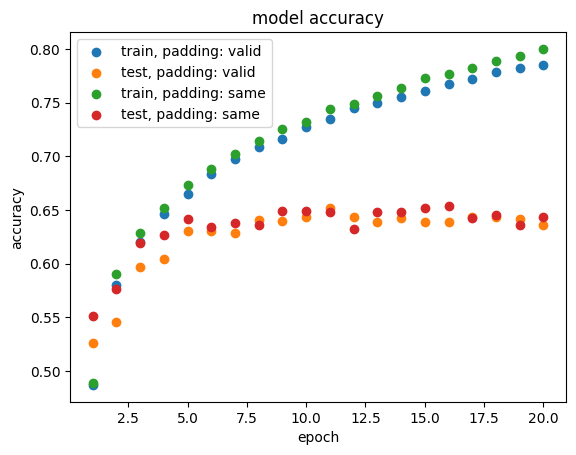

In [138]:
for i in range(2):
    plt.scatter(range(1,21), train_acc_p[i,:], label=f'train, padding: {padding_opt[i]}')
    plt.scatter(range(1,21), test_acc_p[i,:], label=f'test, padding: {padding_opt[i]}')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

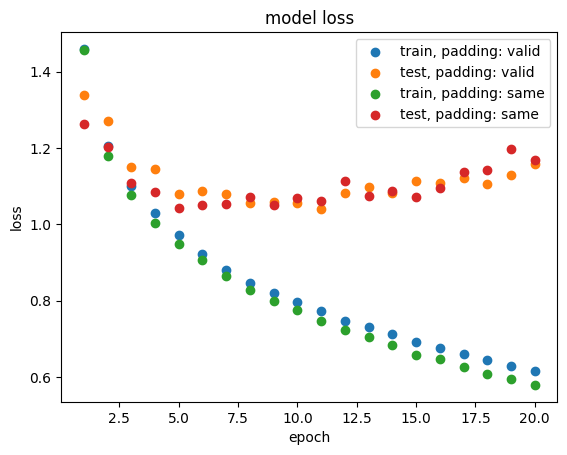

In [139]:
for i in range(2):
    plt.scatter(range(1,21), train_loss_p[i,:], label=f'train, padding: {padding_opt[i]}')
    plt.scatter(range(1,21), test_loss_p[i,:], label=f'test, padding: {padding_opt[i]}')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Change strides

In [104]:
def strides_model(s):
    smodel = keras.models.Sequential()
    smodel.add(keras.Input(shape=(32, 32, 3)))
    smodel.add(keras.layers.Conv2D(filters = 36, 
                             kernel_size = (3, 3), 
                             padding = 'valid',
                             strides = s,
                             activation='relu'))
    smodel.add(keras.layers.MaxPooling2D((2, 2)))
    smodel.add(keras.layers.Flatten())
    smodel.add(keras.layers.Dense(10, activation='softmax'))
    smodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return smodel
    

In [105]:
m = 1 #repeat
n = 10
train_acc_s = np.zeros((n,20))
test_acc_s = np.zeros((n,20))
train_loss_s = np.zeros((n,20))
test_loss_s = np.zeros((n,20))
for j in range(m):
    for i in range(n):
        temp_model1_s = strides_model(i+1)
        temp_model_s = temp_model1_s.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
        train_acc_s[i,:] = temp_model_s.history['accuracy']
        test_acc_s[i,:] = temp_model_s.history['val_accuracy']
        train_loss_s[i,:] = temp_model_s.history['loss']
        test_loss_s[i,:] = temp_model_s.history['val_loss']
        print(f'ROUND {j*n+i}')

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4144 - loss: 1.6543 - val_accuracy: 0.5699 - val_loss: 1.2443
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5744 - loss: 1.2123 - val_accuracy: 0.5771 - val_loss: 1.2135
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6210 - loss: 1.0959 - val_accuracy: 0.6035 - val_loss: 1.1555
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6483 - loss: 1.0186 - val_accuracy: 0.6071 - val_loss: 1.1447
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6649 - loss: 0.9765 - val_accuracy: 0.6263 - val_loss: 1.0988
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6863 - loss: 0.9155 - val_accuracy: 0.6214 - val_loss: 1.0984
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6981 - loss: 0.8780 - val_accuracy: 0.6320 - val_loss: 1.0794
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7077 - loss: 0.845

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5908 - loss: 1.1795 - val_accuracy: 0.5670 - val_loss: 1.2353
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5962 - loss: 1.1593 - val_accuracy: 0.5783 - val_loss: 1.2112
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5995 - loss: 1.1531 - val_accuracy: 0.5814 - val_loss: 1.2046
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6070 - loss: 1.1319 - val_accuracy: 0.5753 - val_loss: 1.2068
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6047 - loss: 1.1373 - val_accuracy: 0.5860 - val_loss: 1.1899
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6142 - loss: 1.1095 - val_accuracy: 0.5723 - val_loss: 1.2194
Epoch 16/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6143 - loss: 1.1104 - val_accuracy: 0.5855 - val_loss: 1.1893
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6199 - loss: 1.1013 - val_

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5373 - loss: 1.3119 - val_accuracy: 0.5380 - val_loss: 1.3202
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5411 - loss: 1.3063 - val_accuracy: 0.5385 - val_loss: 1.3149
ROUND 4
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2111 - loss: 2.1262 - val_accuracy: 0.3301 - val_loss: 1.8563
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3419 - loss: 1.8425 - val_accuracy: 0.3711 - val_loss: 1.7646
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3707 - loss: 1.7583 - val_accuracy: 0.3739 - val_loss: 1.7405
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3831 - loss: 1.7259 - val_accuracy: 0.3927 - val_loss: 1.7034
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3888 - loss: 1.7006 - val_accuracy: 0.3980 - val_loss: 1.6911
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4013 - loss: 1.6812 - va

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3948 - loss: 1.6773 - val_accuracy: 0.3972 - val_loss: 1.6775
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4053 - loss: 1.6565 - val_accuracy: 0.4022 - val_loss: 1.6572
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4072 - loss: 1.6514 - val_accuracy: 0.4079 - val_loss: 1.6470
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4043 - loss: 1.6506 - val_accuracy: 0.4126 - val_loss: 1.6345
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4110 - loss: 1.6308 - val_accuracy: 0.4115 - val_loss: 1.6405
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4135 - loss: 1.6285 - val_accuracy: 0.4133 - val_loss: 1.6263
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4193 - loss: 1.6139 - val_accuracy: 0.4126 - val_loss: 1.6149
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4197 - loss: 1.6193 - val_a

Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2839 - loss: 1.9379 - val_accuracy: 0.2858 - val_loss: 1.9430
Epoch 19/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2810 - loss: 1.9438 - val_accuracy: 0.2852 - val_loss: 1.9451
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2804 - loss: 1.9427 - val_accuracy: 0.2812 - val_loss: 1.9431
ROUND 9


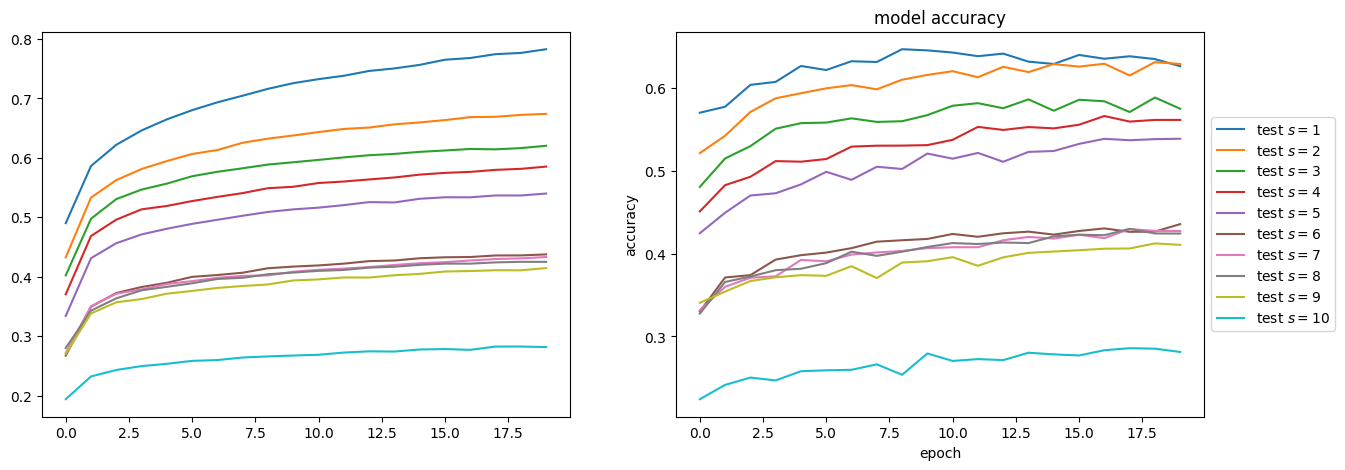

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ssizes = range(1,n+1)
for i in range(10):
    axes[0].plot(range(20), train_acc_s[i,:], label=f'train $s={ssizes[i]}$')
    axes[1].plot(range(20), test_acc_s[i,:], label=f'test $s={ssizes[i]}$')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

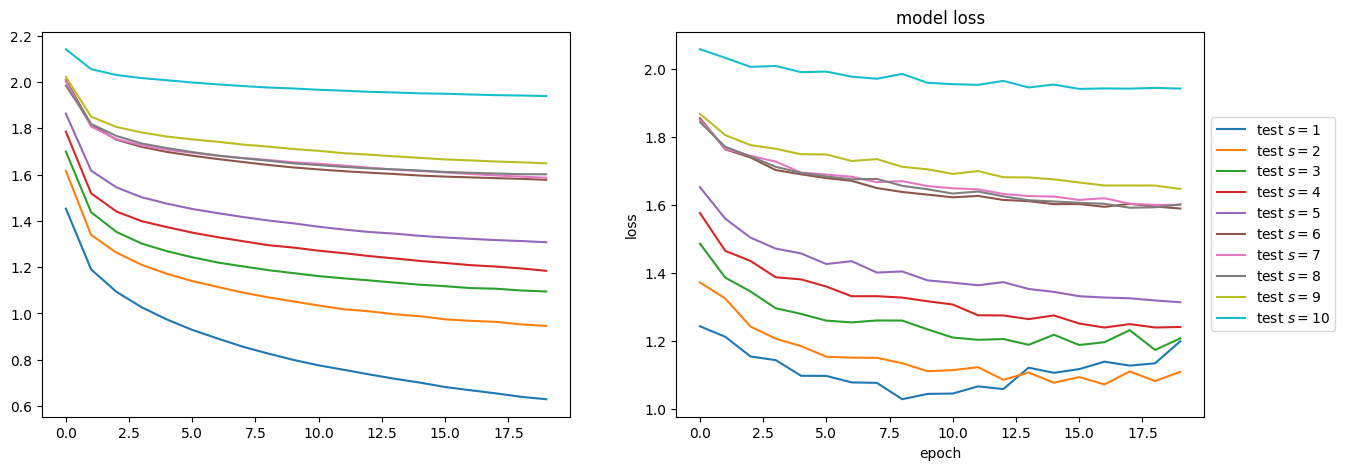

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    axes[0].plot(range(20), train_loss_s[i,:], label=f'train $s={ssizes[i]}$')
    axes[1].plot(range(20), test_loss_s[i,:], label=f'test $s={ssizes[i]}$')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()